In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve, LearningCurveDisplay

from src.config import DADOS_TRATADOS

sns.set_theme(palette="bright")

RANDOM_STATE = 42

In [3]:
df = pd.read_parquet(DADOS_TRATADOS)

df.head()

,idade,sexo,imc,pressao_media,colesterol_total,ldl,hdl,colesterol_hdl,triglicerides,glicose,target
0,59,2,32.099998,101.0,157,93.199997,38.0,4.0,4.8598,87,151
1,48,1,21.600000,87.0,183,103.199997,70.0,3.0,3.8918,69,75
2,72,2,30.500000,93.0,156,93.599998,41.0,4.0,4.6728,85,141
3,24,1,25.299999,84.0,198,131.399994,40.0,5.0,4.8903,89,206
4,50,1,23.000000,101.0,192,125.400002,52.0,4.0,4.2905,80,135


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idade             442 non-null    int8   
 1   sexo              442 non-null    int8   
 2   imc               442 non-null    float32
 3   pressao_media     442 non-null    float32
 4   colesterol_total  442 non-null    int16  
 5   ldl               442 non-null    float32
 6   hdl               442 non-null    float32
 7   colesterol_hdl    442 non-null    float32
 8   triglicerides     442 non-null    float32
 9   glicose           442 non-null    int8   
 10  target            442 non-null    int16  
dtypes: float32(6), int16(2), int8(3)
memory usage: 13.5 KB


Em machine learning, a curva de aprendizado serve para avaliar o desempenho de um modelo em função da quantidade de dados de treinamento. Ela é um gráfico que mostra como a performance do modelo (geralmente medida por uma métrica de erro, como o erro quadrático médio ou a acurácia) evolui conforme o modelo é treinado com um número crescente de amostras.

### Curvas de Aprendizado

Geralmente, as curvas de aprendizado são apresentadas em dois gráficos principais: uma curva de treinamento e uma curva de validação. A **curva de treinamento** representa o erro do modelo nos dados de treinamento, enquanto a **curva de validação** representa o erro do modelo em um conjunto de validação separado, que não é usado durante o treinamento.

### Perfis Comuns de Curvas de Aprendizado

1. **Alta Variância (Overfitting)**:
   - **Descrição**: Quando o modelo possui alta variância, ele se ajusta muito bem aos dados de treinamento, mas falha em generalizar para novos dados. Isso se reflete em um baixo erro nos dados de treinamento, mas um erro significativamente maior nos dados de validação.
   - **Curva de Treinamento**: O erro é baixo.
   - **Curva de Validação**: O erro é alto e não diminui substancialmente com mais dados de treinamento.
   - **Solução**: Pode ser necessário simplificar o modelo, adicionar regularização, ou aumentar a quantidade de dados de treinamento.



2. **Alta Bias (Underfitting)**:
   - **Descrição**: Um modelo com alta bias não consegue capturar a complexidade dos dados, resultando em um desempenho ruim tanto nos dados de treinamento quanto nos de validação.
   - **Curva de Treinamento**: O erro é alto.
   - **Curva de Validação**: O erro também é alto, e ambas as curvas se aproximam uma da outra, indicando que o modelo não está aprendendo o suficiente.
   - **Solução**: Pode ser necessário aumentar a complexidade do modelo, adicionar mais recursos, ou ajustar hiperparâmetros.


3. **Curva Ideal**:
   - **Descrição**: Em uma curva de aprendizado ideal, o erro de treinamento e o erro de validação começam altos, mas diminuem conforme mais dados de treinamento são utilizados. Eventualmente, as duas curvas se estabilizam em valores baixos, indicando que o modelo está generalizando bem.
   - **Curva de Treinamento**: O erro diminui e se estabiliza.
   - **Curva de Validação**: O erro diminui inicialmente e depois se estabiliza em um valor próximo ao da curva de treinamento, mas ligeiramente superior.


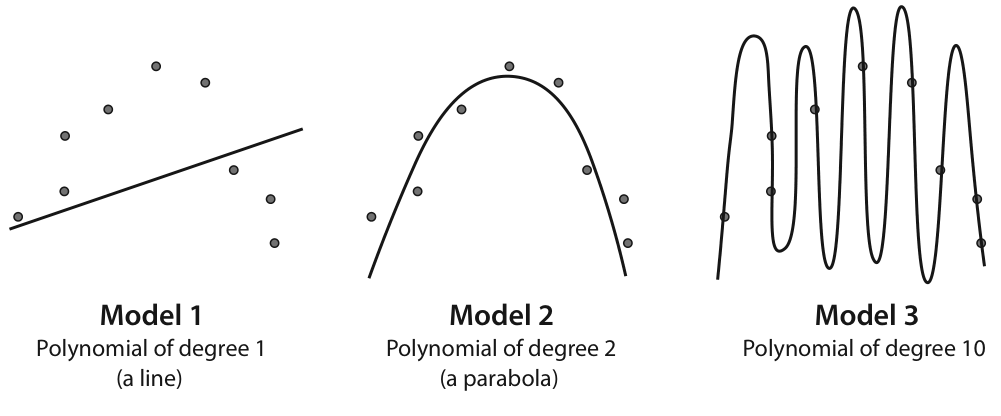

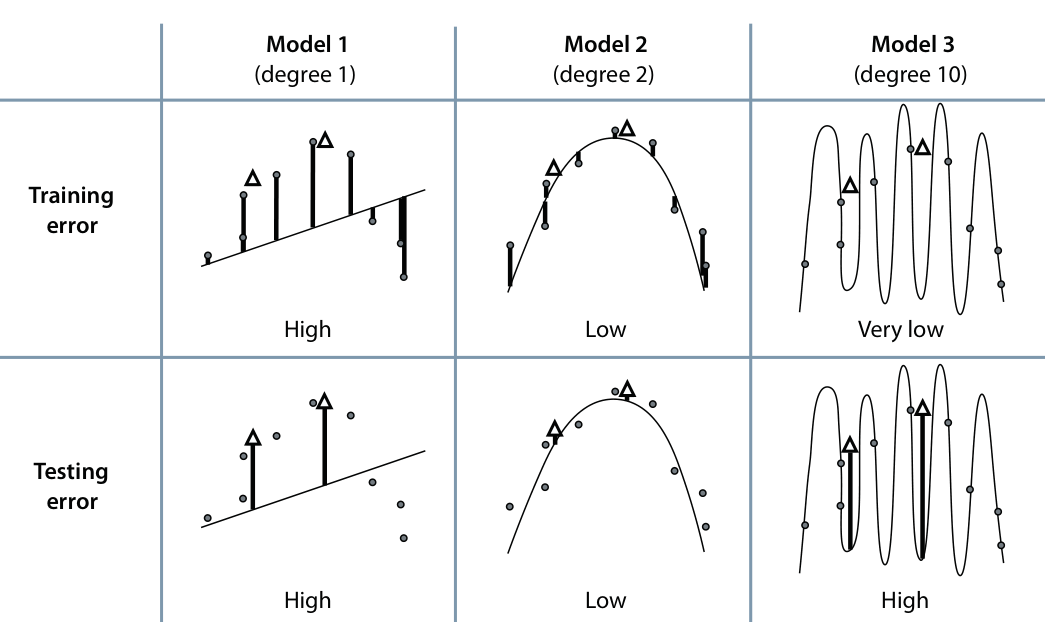

https://scikit-learn.org/stable/modules/learning_curve.html#learning-curve

In [9]:
X = df.drop(columns="target")
y = df["target"]

In [11]:
regressor = LinearRegression()

In [13]:
train_sizes, train_scores, test_scores = learning_curve(regressor, X, y, shuffle=True, random_state=RANDOM_STATE)

In [15]:
train_sizes

array([ 35, 114, 194, 273, 353])

In [17]:
train_scores

array([[0.61221516, 0.45738506, 0.77514839, 0.66202217, 0.52254379],
       [0.5711481 , 0.50628573, 0.58847117, 0.60084981, 0.51478857],
       [0.54953408, 0.4647184 , 0.58830178, 0.57498568, 0.51596987],
       [0.54709995, 0.51577222, 0.54290336, 0.51517493, 0.50096214],
       [0.52428257, 0.51032126, 0.52382994, 0.52972829, 0.51080525]])

In [19]:
test_scores

array([[0.23248577, 0.29231149, 0.17135656, 0.38155431, 0.17565048],
       [0.39834666, 0.48786032, 0.46345115, 0.44361037, 0.52191055],
       [0.38688236, 0.49235553, 0.42879266, 0.44853199, 0.52732199],
       [0.39643884, 0.52479494, 0.45648789, 0.43386775, 0.54264426],
       [0.42955661, 0.52259958, 0.48247331, 0.42628604, 0.55120766]])

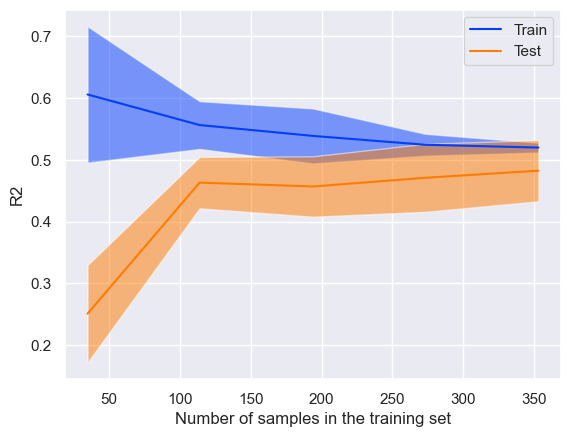

In [25]:
display_learning_curve = LearningCurveDisplay(
    train_sizes=train_sizes,
    train_scores=train_scores,
    test_scores=test_scores,
    score_name="R2"
)

display_learning_curve.plot()